In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M

sys.path.append(r'G:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import time
import random

In [2]:
M.__version__

'0.0.12dev'

In [3]:
# Oruanui Tuff from Tramontano et al. 2017; 85 MPa
comp = {'SiO2_Liq': 75.63,
        'TiO2_Liq': 0.2,
        'Al2O3_Liq': 13.37,
        'Cr2O3_Liq': 0.0,
        'FeOt_Liq': 1.22 + 0.45*71.844/(159.69/2),
        'CaO_Liq': 1.62,
        'MgO_Liq': 0.27,
        'MnO_Liq': 0.06,
        'K2O_Liq': 2.96,
        'Na2O_Liq': 4.08,
        'P2O5_Liq': 0.02,
        'H2O_Liq': 3.5,
        'CO2_Liq': 0.002,
        'Fe3Fet_Liq': 0.4}

In [4]:
Comp = pd.DataFrame.from_records([comp]*50)
CO2 = np.zeros(50)
H2O_Liq = np.zeros(50)
CO2_Liq = np.linspace(0.001,0.2,5)
for i in range(len(CO2_Liq)):
    CO2[i*10:i*10+10] = CO2_Liq[i]
    H2O_Liq[i*10:i*10+10] = np.linspace(0.1, 6, 10)
    
Comp['H2O_Liq'] = H2O_Liq
Comp['CO2_Liq'] = CO2

In [5]:
Results = M.multi_path(Model = "MELTSv1.2.0", comp = Comp, T_start_C = 950, T_end_C = 750, dt_C = 1,
                      P_bar = 1500, isochoric = True, fO2_buffer = "NNO", 
                       find_liquidus = True, fluid_sat = True)

  0%|          | 0/3 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 19.0 ... Complete (time taken = 1057.46 seconds)
Running MELTSv1.2.0 calculations 20 to 39.0 ... Complete (time taken = 1064.38 seconds)
Running MELTSv1.2.0 calculations 40 to 49.0 ... Complete (time taken = 369.87 seconds)


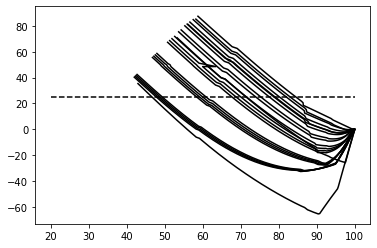

In [6]:
f, a = plt.subplots(1,1)
a.plot([20,100], [25,25], '--k')
for r in Results.keys():
    #if Results[r]['Mass']['fluid1'].loc[0]<0.1:
    if Results[r]['liquid1']['H2O_Liq'].loc[i]>3:
        a.plot(Results[r]['Mass']['liquid1'], Results[r]['All']['P_bar']/10 - 150, '-k')

In [7]:
Results

{'index = 8': {'Conditions':             T_C        P_bar             h           s          v
  0    853.400000  1500.000000 -1.353389e+06  268.562036  45.650895
  1    852.396117  1483.365777 -1.353633e+06  268.413604  45.650605
  2    851.392233  1474.172055 -1.353853e+06  268.255854  45.650910
  3    850.388350  1476.061797 -1.354036e+06  268.086320  45.650958
  4    849.384466  1478.147977 -1.354218e+06  267.916541  45.650991
  ..          ...          ...           ...         ...        ...
  99   754.015534  2294.744930 -1.372063e+06  248.230527  45.651855
  100  753.011650  2309.262347 -1.372239e+06  247.992077  45.651843
  101  752.007767  2323.744668 -1.372415e+06  247.753859  45.651829
  102  751.003883  2338.188268 -1.372590e+06  247.515886  45.651814
  103  750.000000  2352.589528 -1.372765e+06  247.278171  45.651797
  
  [104 rows x 5 columns],
  'liquid1':       SiO2_Liq  TiO2_Liq  Al2O3_Liq  Cr2O3_Liq  Fe2O3_Liq   FeO_Liq  FeOt_Liq  \
  0    71.875395  0.190071  12.706